In [178]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import scipy
import numpy as np
import seaborn as sns

In [179]:
data1 = pd.read_csv("../device-5-sizepayload-6-msg-100/regressao-5-6-100.csv")
data1["device"] = 5
data2 = pd.read_csv("../device-5-sizepayload-246-msg-100/regressao-5-246-100.csv")
data2["device"] = 5
data3 = pd.read_csv("../device-10-sizepayload-6-msg-100/regressao-10-6-100.csv")
data3["device"] = 10
data4 = pd.read_csv("../device-10-sizepayload-256-msg-100/regressao-10-246-100.csv")
data4["device"] = 10
data = [data1, data2,data3,data4]



In [180]:
reg = pd.concat(data)
reg.reset_index(inplace=True)

<AxesSubplot:xlabel='RTT'>

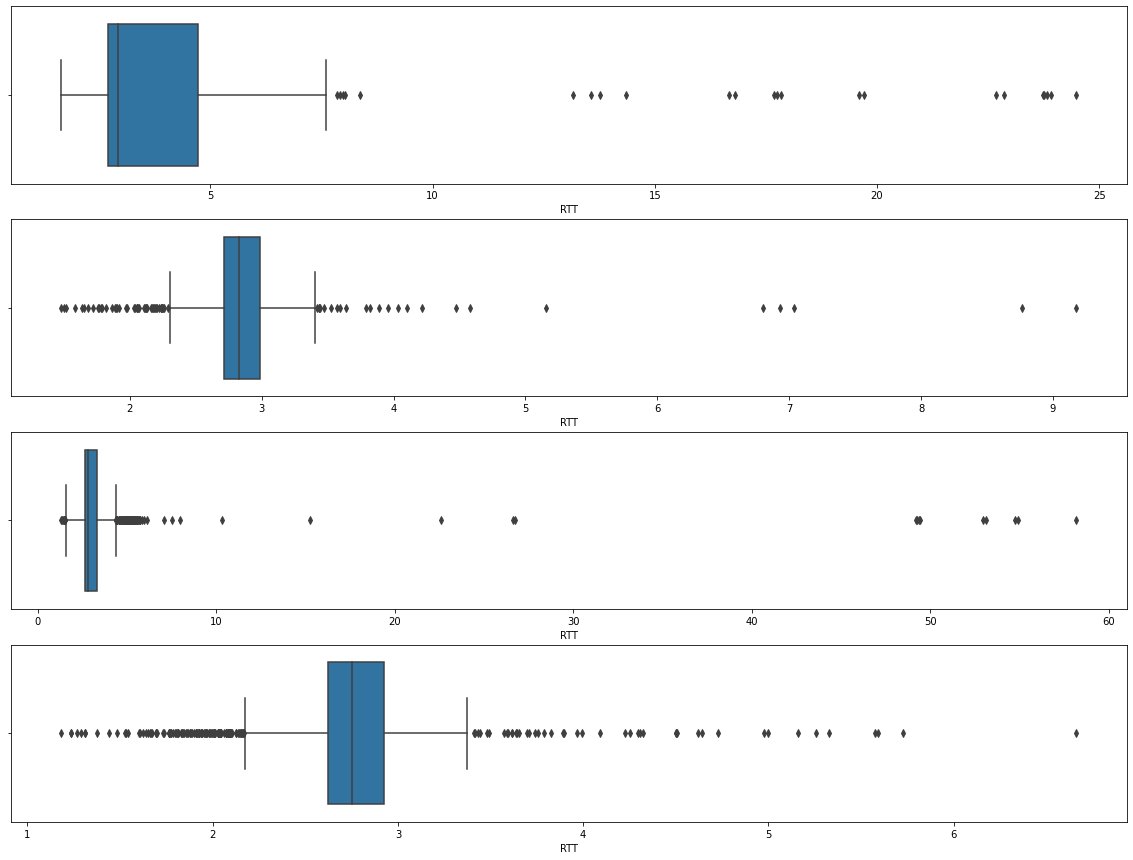

In [202]:
fig, axes = plt.subplots(4, 1, figsize=(20, 15))

sns.boxplot(ax=axes[0],data=data1, x="RTT")
sns.boxplot(ax=axes[1], data=data2, x="RTT")
sns.boxplot(ax=axes[2], data=data3, x="RTT")
sns.boxplot(ax=axes[3], data=data4, x="RTT")




In [105]:
q3, q1 = np.percentile(reg["RTT"], [75, 25])
interquartil = q3 - q1
limite_superior =q3 + 1.5 * interquartil
limite_inferior = q1 - 1.5 * interquartil 
price = []
df_novo = reg.loc[((reg["RTT"]>limite_inferior) & (reg["RTT"]<limite_superior))]
dados_excluidos = reg["RTT"].shape[0] - len(df_novo)
print("Nossa nova média é {}" .format(np.mean(df_novo["RTT"])))
print("Foram eliminados o total de {} outliers"  .format(dados_excluidos))
media =np.mean(df_novo["RTT"])

Nossa nova média é 2.782325712164938
Foram eliminados o total de 616 outliers


In [106]:
df_novo.corr().round(4)

,index,Time_publish,Time_ack,Size_Payload,RTT,device
index,1.0000,0.3094,0.3094,-0.0282,-0.0104,0.3972
Time_publish,0.3094,1.0000,1.0000,0.2823,-0.0326,0.5983
Time_ack,0.3094,1.0000,1.0000,0.2823,-0.0325,0.5983
Size_Payload,-0.0282,0.2823,0.2823,1.0000,0.0451,-0.0256
RTT,-0.0104,-0.0326,-0.0325,0.0451,1.0000,-0.0761
device,0.3972,0.5983,0.5983,-0.0256,-0.0761,1.0000


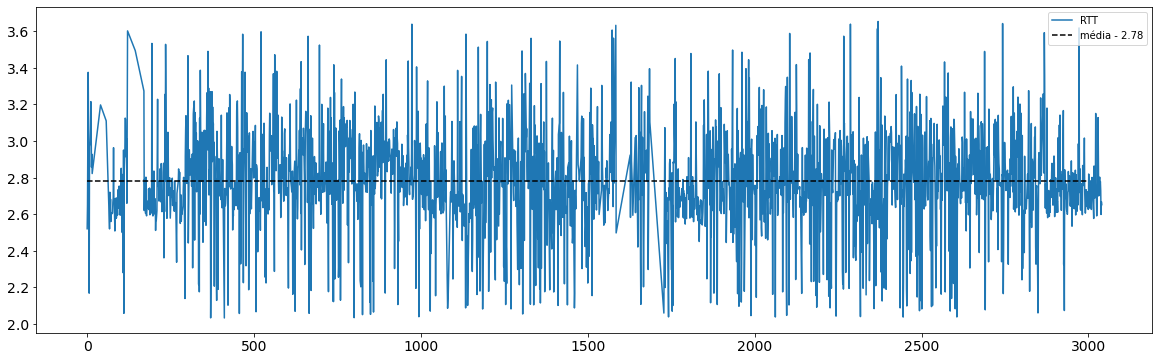

In [207]:

fig, ax = plt.subplots(figsize=(20, 6))
ax = df_novo['RTT'].plot(fontsize=14)
ax.hlines((df_novo['RTT'].mean()), xmax=3000, xmin=0, linestyles="dashed", color="black" , label="média - {}".format(round(df_novo['RTT'].mean(),2)))
ax.legend()


<AxesSubplot:>

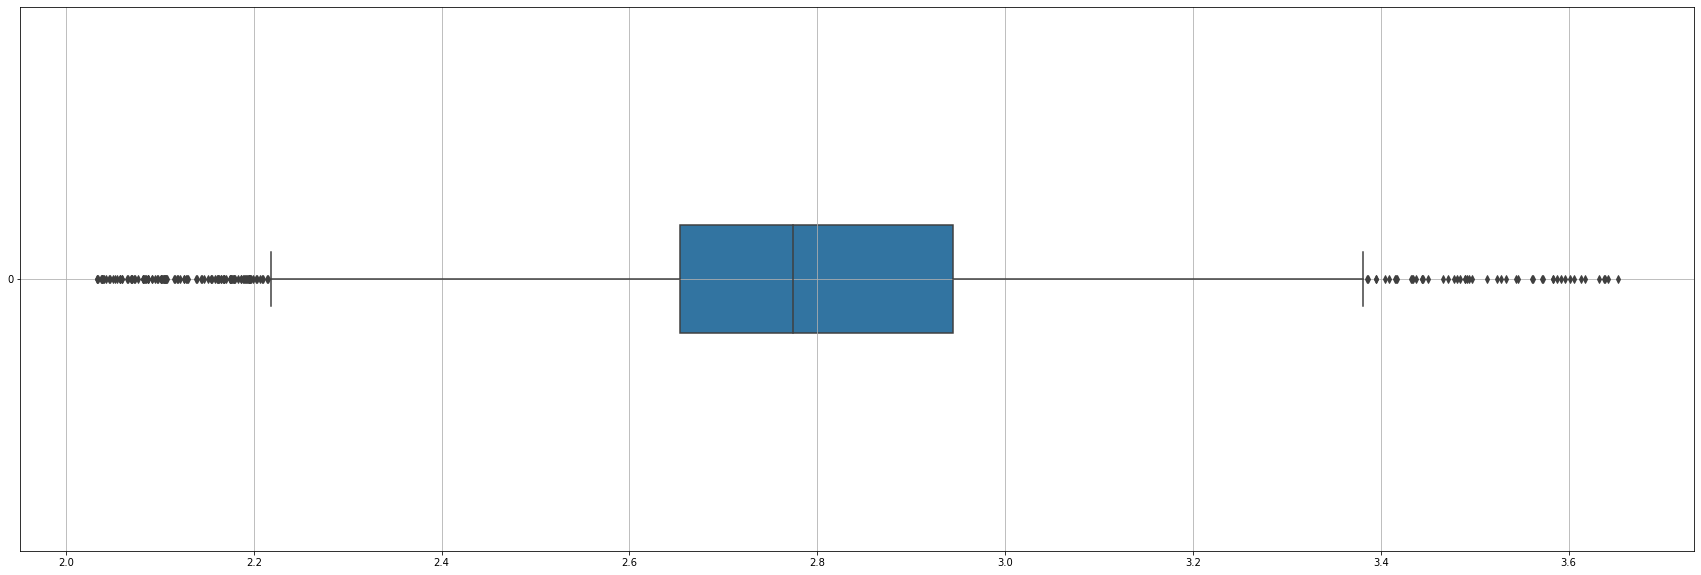

In [110]:

ax = sns.boxplot(data=df_novo['RTT'], orient='h', width=0.2)
ax.figure.set_size_inches(30, 10)
ax.grid()


ax


In [111]:
from sklearn.model_selection import train_test_split


In [113]:
y = df_novo["RTT"]

In [114]:
X = df_novo[['device', 'Size_Payload']]


In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)


In [116]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [117]:
modelo = LinearRegression()


In [118]:
modelo.fit(X_train, y_train)


LinearRegression()

In [124]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))


R² = 0.01


In [125]:
y_previsto = modelo.predict(X_test)


In [126]:
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2))


R² = 0.01


In [142]:
X_test

,device,Size_Payload
2165,10,246.0
276,5,6.0
1057,10,6.0
2674,10,246.0
2082,10,246.0
...,...,...
326,5,6.0
2894,10,246.0
2121,10,246.0
2568,10,246.0


In [137]:
modelo.predict(entrada)[0]


2.756740356881898

In [129]:
reg.loc[1866]

index           846.000000
Time_publish     98.294991
Time_ack         98.297642
Size_Payload      6.000000
RTT               2.650785
device           10.000000
Name: 1866, dtype: float64

In [135]:
device=5
Size_Payload=6
entrada=[[device, Size_Payload]]
modelo.predict(entrada)[0]

/home/joao/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


2.7971775472803464

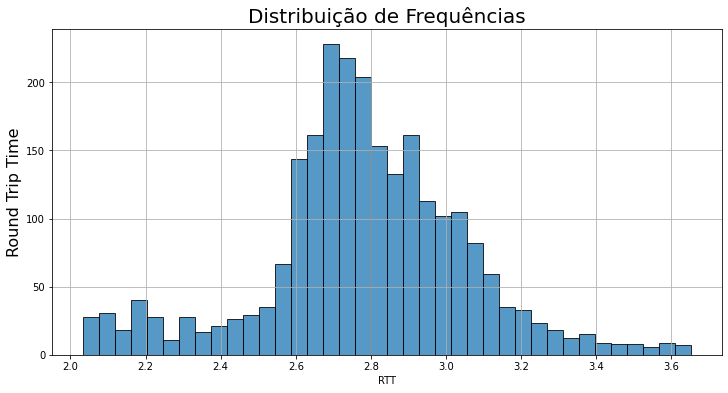

In [134]:
ax = sns.histplot(df_novo['RTT'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_ylabel('Round Trip Time', fontsize=16)
ax.grid()
ax;